In [3]:
!pip uninstall pillow && Y
!CC="cc -mavx2" pip install -U --force-reinstall pillow-simd

Found existing installation: Pillow 9.0.0
Uninstalling Pillow-9.0.0:
  Would remove:
    /home/user/conda/lib/python3.7/site-packages/PIL/*
    /home/user/conda/lib/python3.7/site-packages/Pillow-9.0.0.dist-info/*
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libXau-00ec42fe.so.6.0.0
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libfreetype-a029e222.so.6.18.1
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libharfbuzz-851aa43c.so.0.30200.0
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libjpeg-b8a30ecc.so.62.3.0
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/liblcms2-035b9744.so.2.0.12
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/liblzma-d540a118.so.5.2.5
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libopenjp2-430a98fc.so.2.4.0
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libpng16-213e245f.so.16.37.0
    /home/user/conda/lib/python3.7/site-packages/Pillow.libs/libtiff-

In [41]:
import cv2 as cv
import numpy as np
import os
from PIL import Image, ImageEnhance
from tqdm import tqdm


def preprop(path, path_save, factor_с=1.02, factor_b=1.1, factor_s=1.05):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    im = Image.fromarray(img)
    enh_b = ImageEnhance.Brightness(im)
    im_output = enh_b.enhance(factor_b)
    enh_c = ImageEnhance.Contrast(im_output)
    im_output = enh_c.enhance(factor_с)
    enh_s = ImageEnhance.Sharpness(im)
    im_output = enh_c.enhance(factor_s)
    im_output.save(path_save)

directory = 'train_recognition/images'
files = os.listdir(directory)
lf = len(files)

for i in tqdm(range(lf)):
    preprop(directory + '/' +files[i], 'gray_r/{}'.format(files[i].split('/')[-1]), 1.3, 1.2, 1)

100%|██████████| 176034/176034 [24:42<00:00, 118.76it/s]


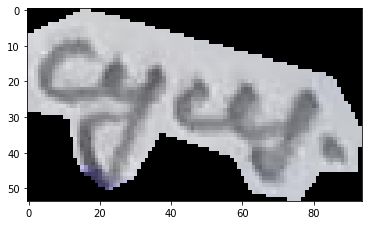

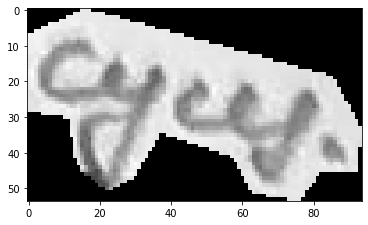

In [40]:
from matplotlib import pyplot as plt
import cv2


def preprocess_image(img, factor_с=1.02, factor_b=1.1, factor_s=1.05):
    img = np.asarray(img)
    img = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv.COLOR_GRAY2BGR)
    im = Image.fromarray(img)
    enh_b = ImageEnhance.Brightness(im)
    im_output = enh_b.enhance(factor_b)
    enh_c = ImageEnhance.Contrast(im_output)
    im_output = enh_c.enhance(factor_с)
    enh_s = ImageEnhance.Sharpness(im)
    im_output = enh_c.enhance(factor_s)
    img = np.asarray(im_output)
    return img

for i in files:
    plt.imshow(Image.open('train_recognition/images/' + i))
    plt.show()    
    plt.imshow(preprocess_image(Image.open('train_recognition/images/' + i)))
    plt.show()
    break